## Notebook informatifs
### Quelques analyses du dataset de test et du modèle
### Analyse métrique métier 2
### Data drift

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from pandas import MultiIndex, Int64Index

# ----------------------------------------------------
import sklearn
import scipy
import statsmodels.api as sm 
from scipy.stats import shapiro
import pickle
from sklearn import metrics

# ----------------------------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# ----------------------------------------------------
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import pycaret
from pycaret.classification import *

# ----------------------------------------------------
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# ----------------------------------------------------
from sklearn.metrics import auc, roc_curve, roc_auc_score
from collections import Counter

from sklearn.metrics import confusion_matrix, recall_score, fbeta_score, precision_score, average_precision_score
from sklearn.metrics import f1_score, accuracy_score, make_scorer, precision_recall_curve
from sklearn.model_selection import cross_validate
#import outils_model

import mlflow
import mlflow.sklearn

# ----------------------------------------------------
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
df_test = pd.read_csv(r"C:\Users\Sofia\OneDrive\Documents\OpenClassrooms\Project_7\API\data_model_test.csv")

In [9]:
# Chargement du meilleur modèle
fic_best_model = r"C:\Users\Sofia\OneDrive\Documents\OpenClassrooms\Project_7\API\best_model.pickle"
with open(fic_best_model, 'rb') as df_best_model:
    best_model = pickle.load(df_best_model)
best_model

LGBMClassifier(class_weight='balanced', learning_rate=0.05, max_bin=500,
               min_child_samples=600, n_estimators=250, num_leaves=10,
               objective='binary', random_state=100, reg_alpha=0.1,
               reg_lambda=0.1)

In [10]:
df_test.shape

(48744, 72)

In [11]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE,AGE,PROBA,TARGET
0,100001,0.0,0.0,0.0,1.0,0.0,0.314879,1.0,0.857143,0.25,0.2,0.2,0.329320,0.670359,0.887175,0.0,0.0,0.0,0.0,0.0,0.0,0.470588,0.0,0.0,0.833333,0.8750,0.0,0.0,0.0,0.0,0.0,0.0,0.923573,0.177549,0.0,0.0,0.0,0.504838,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.600988,0.029593,0.184290,0.076890,0.116162,0.662458,0.414655,0
1,100005,0.0,0.5,0.0,1.0,0.0,0.107266,1.0,0.857143,1.00,0.2,0.2,0.629932,0.418634,0.774489,0.0,0.0,0.0,0.0,0.0,0.0,0.529412,0.0,0.0,0.000000,0.3125,0.0,0.0,0.0,0.0,0.0,0.0,0.341118,0.482907,0.0,0.0,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,0.735297,0.057260,0.129909,0.089290,0.388042,0.596110,0.459549,0
2,100013,0.0,0.5,1.0,1.0,0.0,0.453287,1.0,0.857143,0.25,0.2,0.2,0.333774,0.861321,0.513269,0.0,0.0,0.0,0.0,0.0,0.0,0.235294,0.0,0.0,0.166667,0.6250,0.0,0.0,0.0,0.0,0.0,0.0,0.818464,0.681715,0.0,0.0,0.0,0.756403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.533333,0.708807,0.038674,0.286254,0.158514,0.485917,0.707384,0.135478,0
3,100028,0.0,0.0,0.0,1.0,0.8,1.000000,1.0,0.857143,1.00,0.2,0.2,0.463142,0.872479,0.415312,0.0,0.0,0.0,0.0,1.0,0.0,0.823529,0.0,0.0,1.000000,0.4375,0.0,0.0,0.0,0.0,0.0,0.0,0.596114,0.683628,0.0,0.0,0.0,0.486340,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,0.614244,0.024603,0.218278,0.078665,0.083503,0.365671,0.259396,0
4,100038,0.0,0.5,1.0,0.0,0.4,0.449827,1.0,0.857143,1.00,0.2,0.2,0.172858,0.744959,0.407809,0.0,0.0,0.0,0.0,0.0,0.0,0.470588,0.0,0.0,0.000000,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.497880,0.557887,0.0,0.0,0.0,0.766363,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.264502,0.650923,0.036331,0.161631,0.090734,0.214439,0.312909,0.216019,0


In [12]:
new_test = df_test.drop(axis=1, columns=['SK_ID_CURR', 'TARGET', 'PROBA'])

In [13]:
y_test_pred_proba = best_model.predict_proba(new_test)[:, 1]
seuil = 0.52

y_seuil_test = y_test_pred_proba > seuil
y_seuil_test = np.array(y_seuil_test> 0)*1

new_test['PROBA'] = y_test_pred_proba
new_test['TARGET'] = y_seuil_test

new_test.shape

(48744, 71)

In [14]:
new_test['TARGET'].value_counts()

1    37085
0    11659
Name: TARGET, dtype: int64

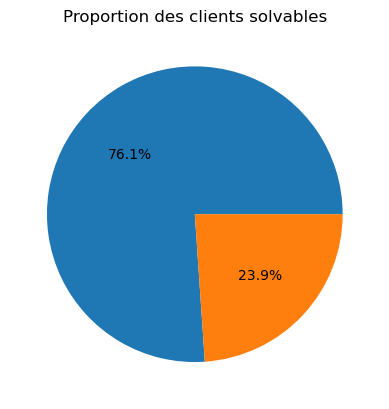

In [16]:
plt.title("Proportion des clients solvables")
plt.pie(new_test["TARGET"].value_counts(),
       autopct='%1.1f%%',
       radius=1)
plt.show()

#### Ajout variable target et proba au dataset de test

In [ ]:
new_test.to_csv(r"C:\Users\Sofia\OneDrive\Documents\OpenClassrooms\Project_7\API\data_model_test.csv", index=False)

### Importance variable

In [17]:
df_test = pd.read_csv(r"C:\Users\Sofia\OneDrive\Documents\OpenClassrooms\Project_7\API\data_model_test.csv")

In [18]:
new_test = df_test.drop(axis=1, columns=['SK_ID_CURR', 'TARGET', 'PROBA'])

In [9]:
# Chargement du meilleur modèle
fic_best_explainer = r"C:\Users\Sofia\OneDrive\Documents\OpenClassrooms\Project_7\API\lgbm_shap_explainer.pickle"
with open(fic_best_explainer, 'rb') as df_best_explainer:
    best_explainer = pickle.load(df_best_explainer)
best_explainer

In [14]:
shap_values = best_explainer(new_test)

 99%|===================| 48466/48744 [04:58<00:01]        

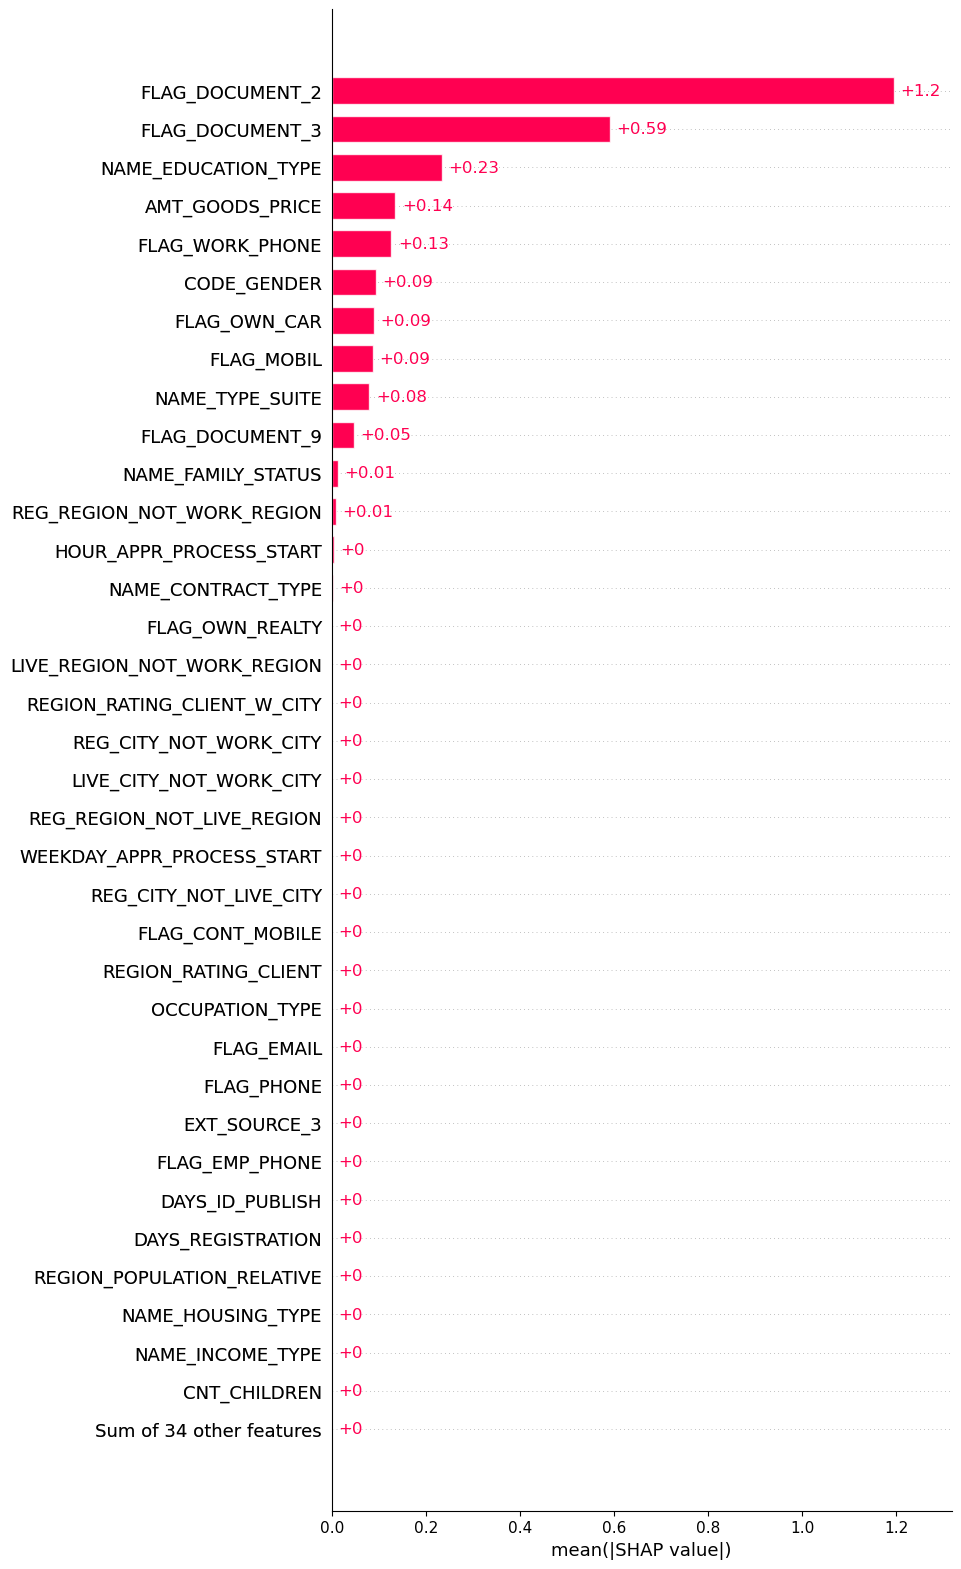

In [16]:
import shap

shap.plots.bar(shap_values, max_display=36)

### Analyse métrique score 2

#### Cette partie la servira à comprendre un peu mieux comment exploité la métrique métier numéro 2, surout que c'est la métrique retenue pour déterminer le seuil de prédictions.
##### Il est determiné par un score = 10*fn + fp. Donc un score qui prend en compte uniquement les prédictions considéré comme fausse. Voyons comment ce score ce score en fonction des résultats fourni.
##### On estime a environ 25% le taux de fausse prédictions, et le but de la métrique est de poussé les FP plutot que les FN. 
##### Lors des tests nous avions a disposition 61 503 individus, 25% de cela est environ 16 000.
##### Si l'on considère la formule comme une suite avec Un = 10*n + 16 000-n et U0=16 000, avec n allant de 0 à 16 000.

In [31]:
df_result = pd.DataFrame(columns=['FN','score'], index=np.arange(0,16000,1))

In [32]:
df_result.shape

(16000, 2)

In [33]:
df_result['FN'] = np.arange(0,16000,1)

In [34]:
for n in range(df_result.shape[0]):
    df_result.loc[n,'score'] = 10*n + 16000-n

In [35]:
df_result.head()

,FN,score
0,0,16000
1,1,16009
2,2,16018
3,3,16027
4,4,16036


<AxesSubplot:xlabel='FN', ylabel='score'>

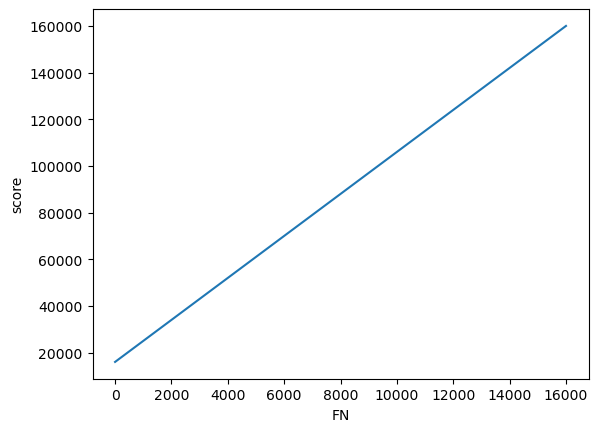

In [36]:
sns.lineplot(data=df_result, x='FN', y='score')

##### On voit bien que FN a plus de poids que FP, et donc de cette manière on remarque que plus il y a de FN et plus le score est elevé. Avec une base de fausse prédictions égale à environ 16000, le score est donc compris entre 16000 et plus de 100 000

In [37]:
# Chargement du meilleur modèle
fic_best_result = r'C:\Users\Sofia\OneDrive\Documents\OpenClassrooms\Project_7\modelisation\df_res_seuil.pickle'
with open(fic_best_result, 'rb') as df_best_result:
    best_result = pickle.load(df_best_result)
best_result

,Modèle,Rappel,Précision,F1,F5,F10,ROC_AUC,PR_AUC,Metier_score,Metier_score_2,Durée_train,Durée_tot,Train_roc_auc_CV,Train_roc_auc_CV +/-,Test_roc_auc_CV,Test_roc_auc_CV +/-,Train_recall_CV,Train_recall_CV +/-,Test_recall_CV,Test_recall_CV +/-,Train_precision_CV,Train_precision_CV +/-,Test_precision_CV,Test_precision_CV +/-
0,LGBM_under_seuil,0.229492,0.308499,0.263194,0.231775,0.230075,0.754212,0.237289,0.789412,41081,0.548904,0.731031,0.776398,0.00086,0.755955,0.007909,0.697069,0.002155,0.682554,0.008988,0.707827,0.000827,0.693443,0.008112
1,LGBM_under_seuil_f10,0.996999,0.084276,0.155415,0.703825,0.900445,0.754212,0.237289,0.259291,54294,0.576154,0.761214,0.776398,0.00086,0.755955,0.007909,0.697069,0.002155,0.682554,0.008988,0.707827,0.000827,0.693443,0.008112
2,LGBM_under_seuil_2,0.652261,0.171471,0.271554,0.588766,0.634642,0.754212,0.237289,0.705524,33132,0.742792,0.929438,0.776398,0.00086,0.755955,0.007909,0.697069,0.002155,0.682554,0.008988,0.707827,0.000827,0.693443,0.008112


In [38]:
# Chargement du meilleur modèle
fic_best_taux = r'C:\Users\Sofia\OneDrive\Documents\OpenClassrooms\Project_7\modelisation\df_taux.pickle'
with open(fic_best_taux, 'rb') as df_best_taux:
    best_taux = pickle.load(df_best_taux)
best_taux.iloc[20:,]

,Modèle,FN,FP,TP,TN
20,LGBM_under_seuil,3851,2571,1147,53934
21,LGBM_under_seuil_f10,15,54144,4983,2361
22,LGBM_under_seuil_2,1738,15752,3260,40753


##### Ici, on peut voir que malgré que le model LGBM seuil avec la métrique métier 1, prédit un nombre de TN sépérieur à celui de LGBM seuil 2, sont score métier 2 est lui plus important. Cela veut dire que le modele LGBM seuil fait gagné plus d'argent, mais en fait perdu plus aussi.
##### De façon exhaustive, mettons une perte à 10 000 et un gain à 200.
#### LGBM seuil : fait gagné 200 * 53934 mais fait perdre 3851 * 10000 + 2571 * 200
#### LGBM seuil 2 : fait gagné 200 * 40753  mais fait perdre 1738 * 10000 +15752 * 200

In [39]:
200*53934 - (3851*10000 + 2571*200)

-28237400

In [40]:
200*40753 - (1738*10000 + 15752*200)

-12379800

#### Ce ne sont que des suppositions de chiffre, mais le plus important reste de ne pas perdre l'argent du crédit, plutot que de prendre l'argent des interet du crédits. Dans ce sens il est préférable de minimisé les pertes et le seuil 2 est celui qui arrive le mieux à faire cela

### Data Drift

In [ ]:
from evidently.dashboard import Dashboard
from evidently.dashboard.tabs import DataDriftTab, CatTargetDriftTab
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset

In [ ]:
# Charger les données initiales et actuelles
#data_init = pd.read_csv(r"C:\Users\Sofia\OneDrive\Documents\OpenClassrooms\Project_7\home-credit-default-risk\application_train.csv")
#data_current = pd.read_csv(r"C:\Users\Sofia\OneDrive\Documents\OpenClassrooms\Project_7\home-credit-default-risk\application_test.csv")
#df , df['TARGET'] = data_init, data_init['TARGET']

# Créer un rapport de dérive de données
#data_drift_report = Dashboard(tabs=[DataDriftTab()])
#data_drift_report.calculate(df[:100], df[100:], column_mapping = None)
#data_drift_report.save(r"C:\Users\Sofia\OneDrive\Documents\OpenClassrooms\Project_7\modelisation\my_report.html")

In [ ]:
data_train = pd.read_csv(r"C:\Users\Sofia\OneDrive\Documents\OpenClassrooms\Project_7\home-credit-default-risk\application_train.csv")
data_test = pd.read_csv(r"C:\Users\Sofia\OneDrive\Documents\OpenClassrooms\Project_7\home-credit-default-risk\application_test.csv")

data_train = data_train.drop(axis=1, columns=['TARGET'])

In [ ]:
data_drift_report = Report(metrics=[
    DataDriftPreset(),
])

data_drift_report.run(reference_data=data_train, current_data=data_test)
data_drift_report

In [ ]:
data_drift_report.save_html(r"C:\Users\Sofia\OneDrive\Documents\OpenClassrooms\Project_7\modelisation\data_drift_report.html")